In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline


In [2]:
data = pd.read_csv(r"//home//kera//Documents//bank_dataset.csv")

In [3]:
data.rename(columns = {'y':'deposit'},inplace = True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [8]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

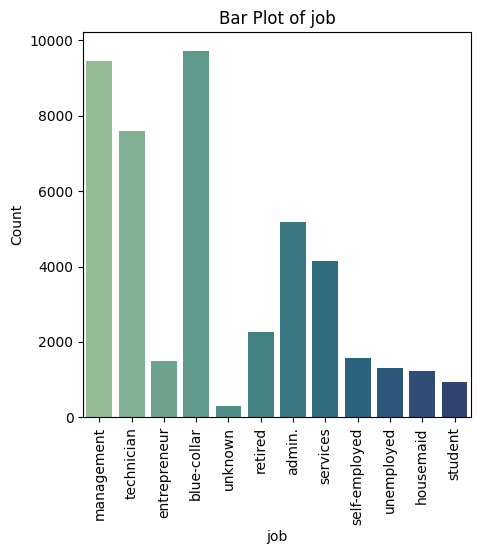

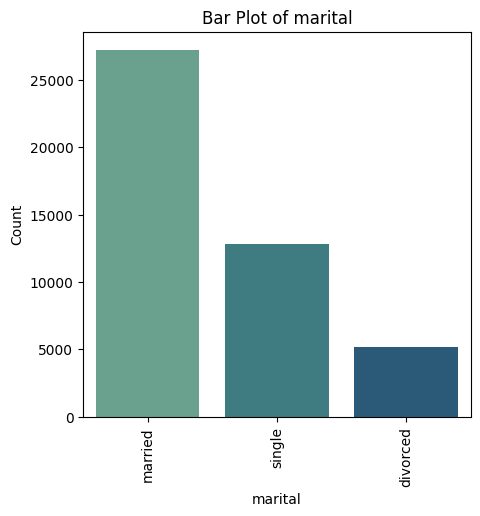

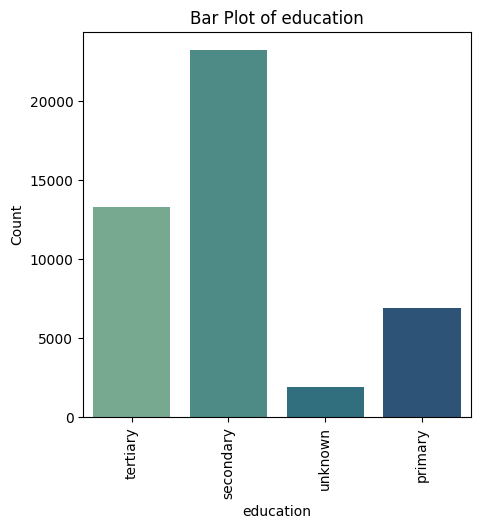

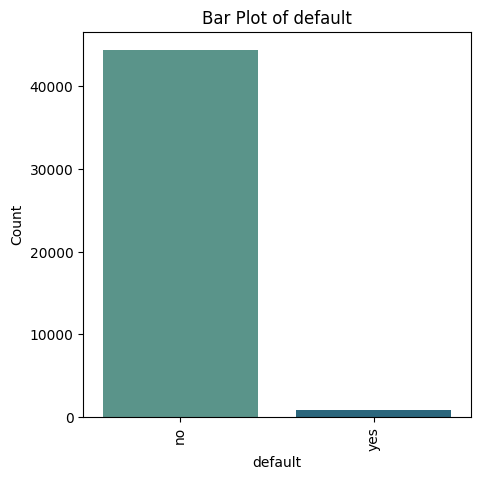

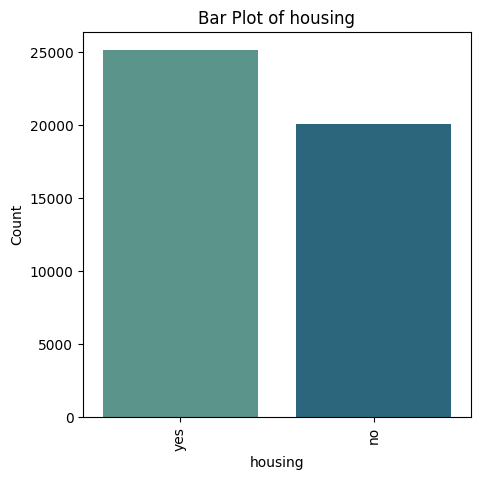

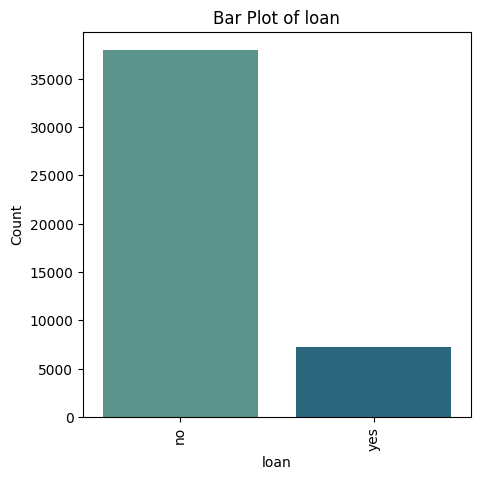

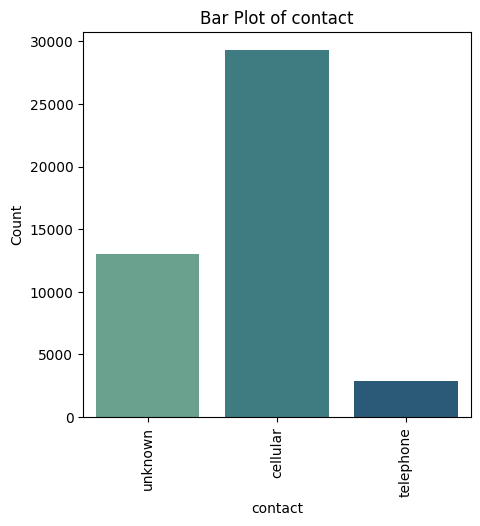

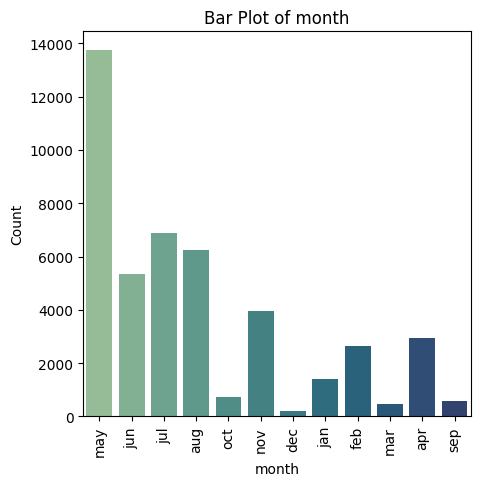

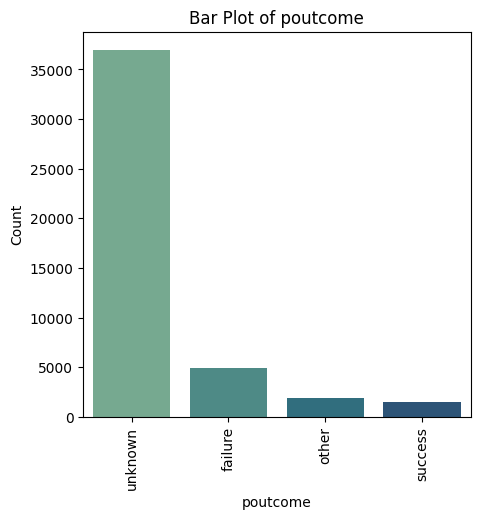

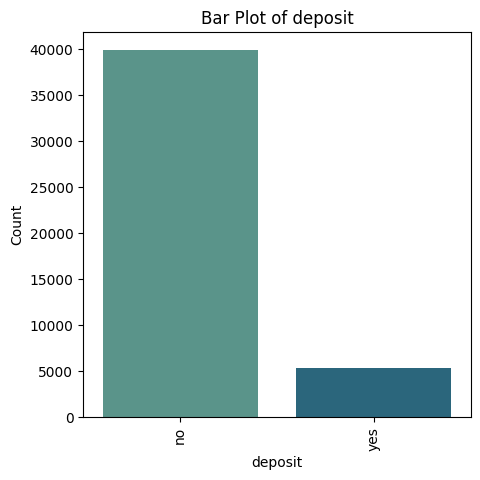

In [9]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x = feature, data = data, palette = 'crest')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

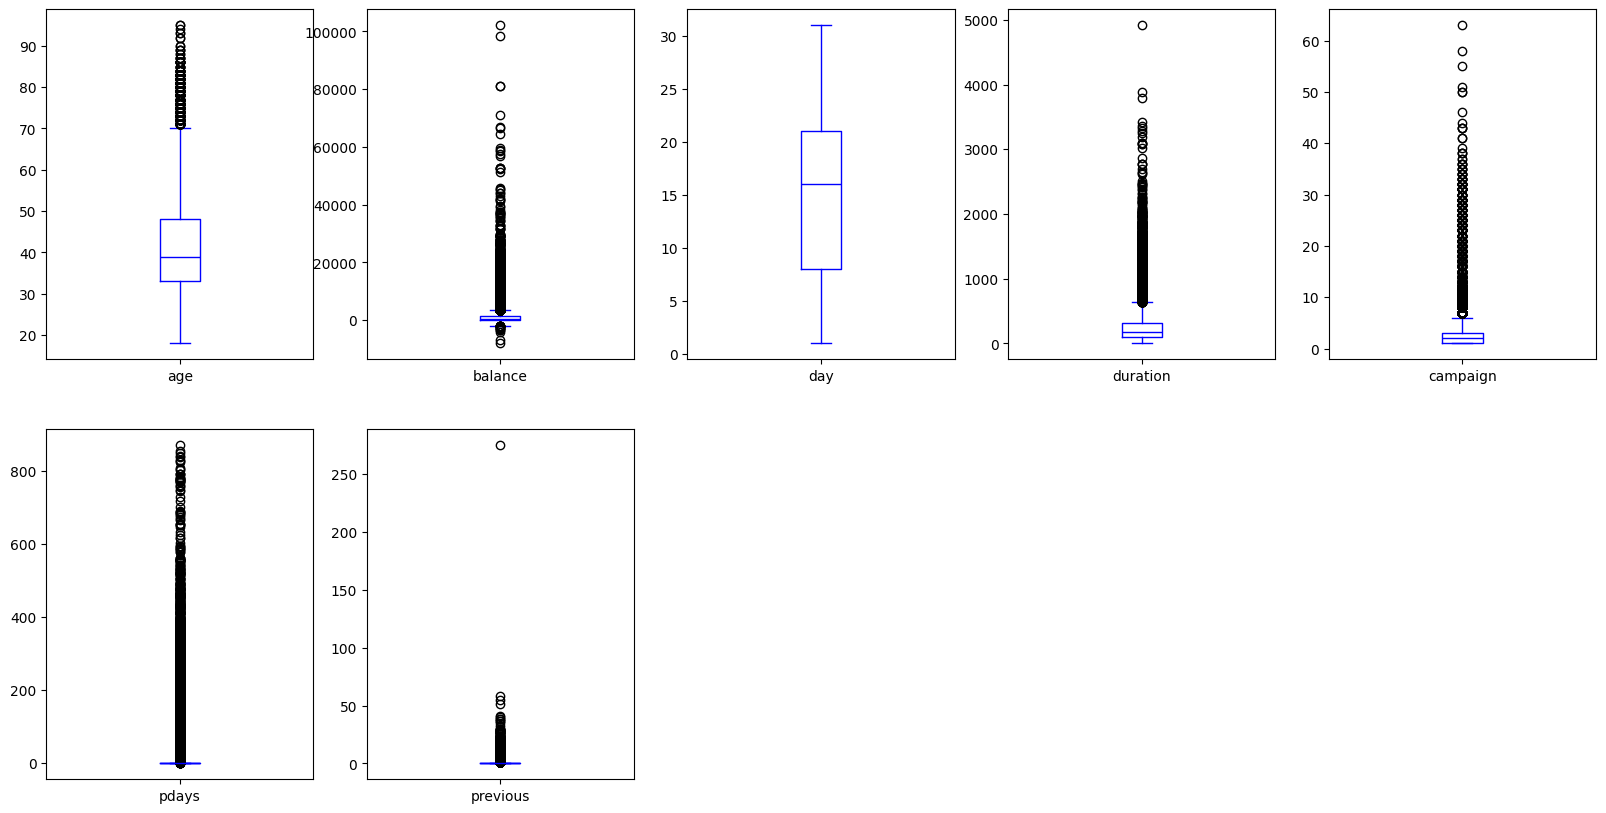

In [10]:
data.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10),color = 'blue')
plt.show()

In [11]:
column = data[['age','campaign','duration']]
q1 = np.quantile(column,0.25)
q3 = np.quantile(column,0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print(iqr,upper_bound,lower_bound)
data[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

100.0 253.0 -147.0


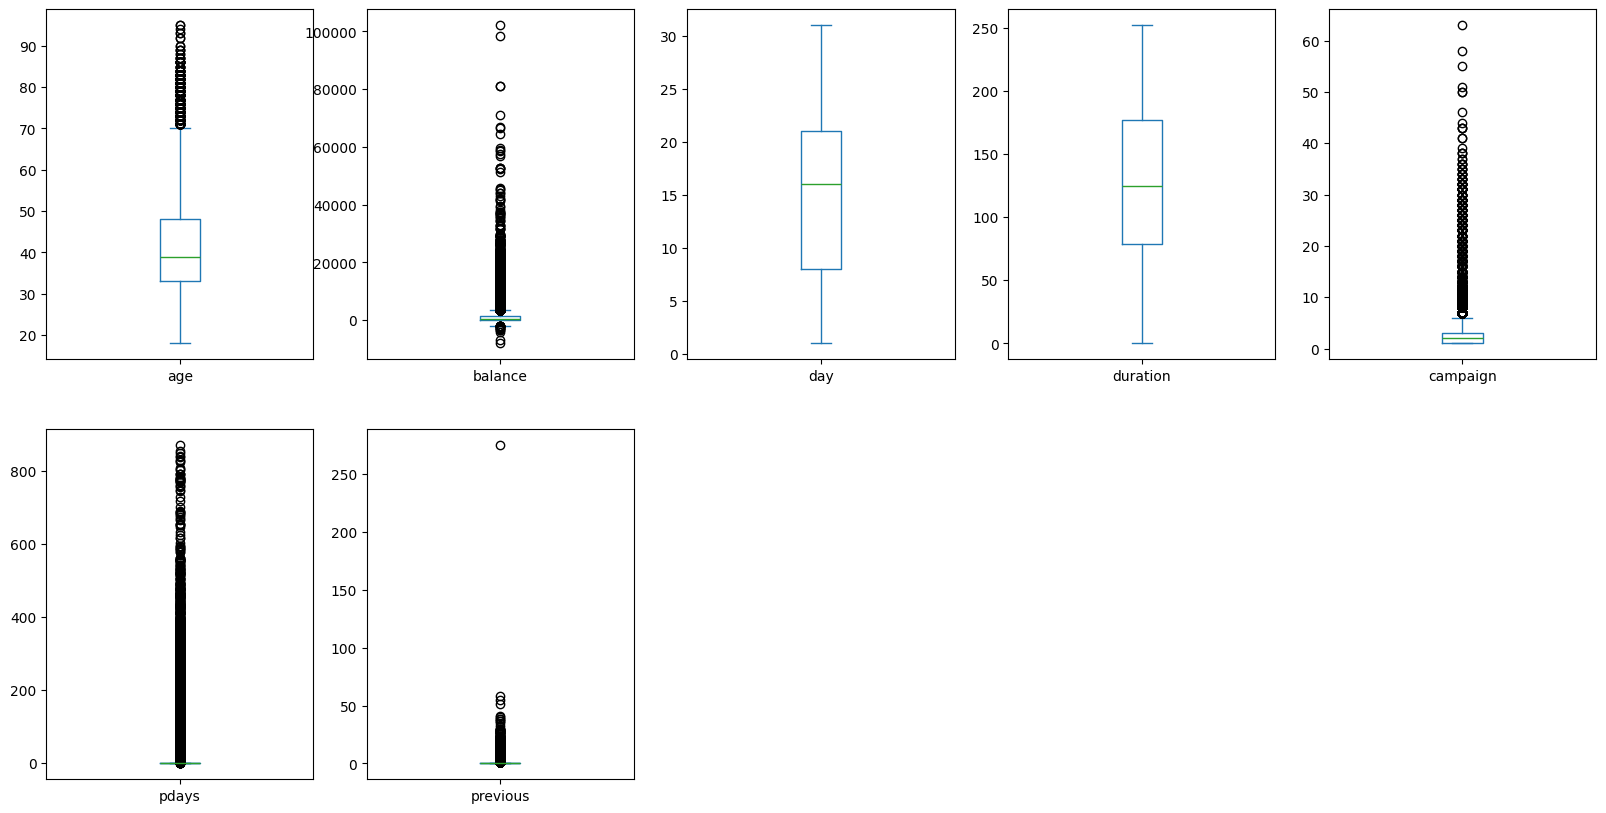

In [12]:
data.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10))
plt.show()

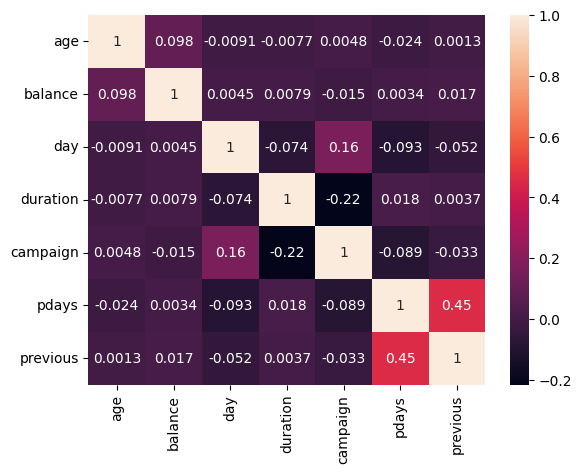

In [13]:
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_encoded = data.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,253,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,253,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,253,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,253,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,253,3,0,0,3,0


In [15]:
data_encoded['deposit'].value_counts() 

0    39922
1     5289
Name: deposit, dtype: int64

In [16]:
x = data_encoded.drop('deposit',axis=1)  
y = data_encoded['deposit']              
print(x.shape)
print(y.shape)

(45211, 16)
(45211,)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import plot_tree

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 16)
(11303, 16)
(33908,)
(11303,)


In [19]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)    

In [20]:
Model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=15)
Model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=15)

In [21]:
mscore(Model)

Training Score 0.8889052730918957
Testing Score 0.88693267274175


In [22]:
ypred_dt = Model.predict(x_test)
eval_model(y_test,ypred_dt)

Accuracy_Score 0.88693267274175
Confusion Matrix
 [[9853  145]
 [1133  172]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9998
           1       0.54      0.13      0.21      1305

    accuracy                           0.89     11303
   macro avg       0.72      0.56      0.58     11303
weighted avg       0.86      0.89      0.86     11303



In [23]:
# cn = class names, fn = feature_names
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


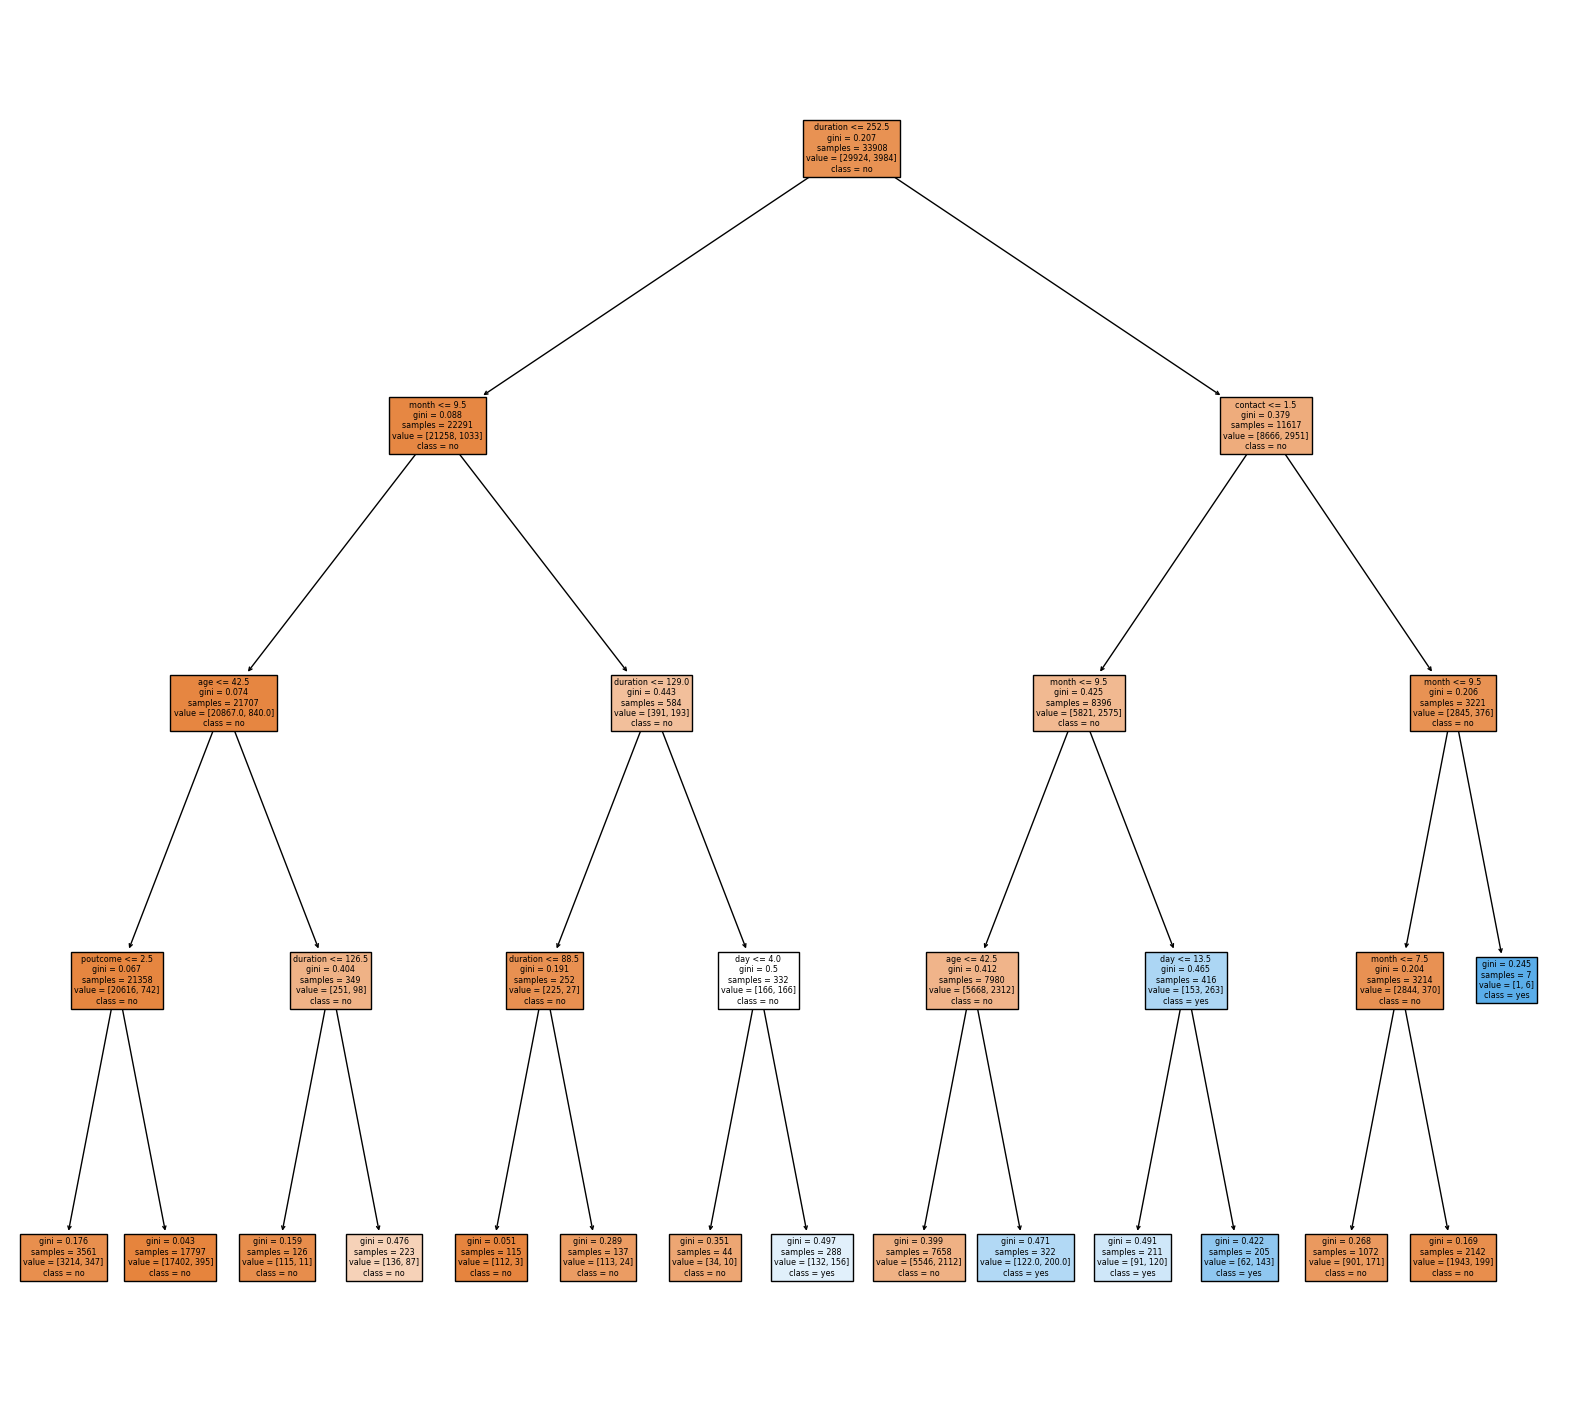

In [24]:
plt.figure(figsize=(20,18))
plot_tree(Model,feature_names=fn,class_names=cn,filled=True)
plt.show()